### Fit a univariate cubic cyclic spline

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

from pymgcv import smooth
from pymgcv.bases import CubicSpline
from pymgcv.gam import gam

n = 60
rng = np.random.default_rng(42)
x = rng.integers(0, 24, size=n)
y = np.sin((x/12)*np.pi) + rng.normal(scale=0.2, size=n)
data = {"x": x, "y": y}

/home/dw16200/Documents/pymgcv/.pixi/envs/dev/lib/python3.13/site-packages/rpy2/rinterface/__init__.py:1185: UserWarning: Environment variable "PWD" redefined by R and overriding existing variable. Current: "/home/dw16200", R: "/home/dw16200/Documents/pymgcv/docs/examples"
  warnings.warn(
/home/dw16200/Documents/pymgcv/.pixi/envs/dev/lib/python3.13/site-packages/rpy2/rinterface/__init__.py:1185: UserWarning: Environment variable "R_SESSION_TMPDIR" redefined by R and overriding existing variable. Current: "/tmp/RtmpbyyF3d", R: "/tmp/RtmpyxbqrR"
  warnings.warn(


Text(0.5, 0, 'Hour')

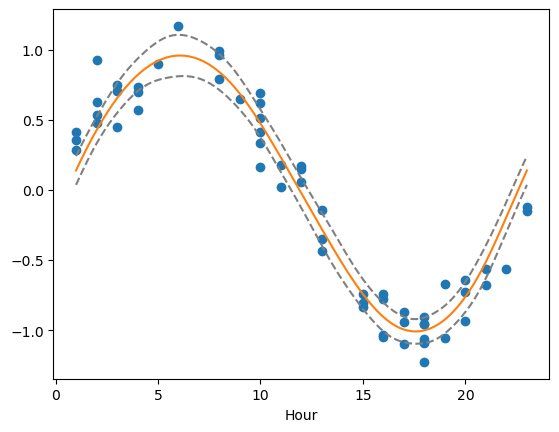

In [2]:

fitted_gam = gam(
    dependent="y",
    independent=[smooth("x", bs=CubicSpline(cyclic=True))],
    data=data,
)

x_linspace = np.linspace(np.min(x), np.max(x), 200)
pred = fitted_gam.predict({"x": x_linspace})

plt.scatter(x, y)
plt.plot(x_linspace, pred["fit"], color="tab:orange")
plt.plot(x_linspace, pred["fit"] + 2 * pred["se_fit"], "--", color="gray")
plt.plot(x_linspace, pred["fit"] - 2 * pred["se_fit"], "--", color="gray")
plt.xlabel("Hour")

In [3]:
print(fitted_gam.summary())


Family: gaussian 
Link function: identity 

Formula:
y ~ s(x, bs = "cc")

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.11440    0.02274   -5.03 5.64e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
       edf Ref.df     F p-value    
s(x) 4.427      8 116.7  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.941   Deviance explained = 94.6%
GCV = 0.034118  Scale est. = 0.031032  n = 60
